### ***1. Importing Needed Libraries:***


In [ ]:
import numpy as np
import random
import math
from math import pi
import matplotlib.pyplot as plt
from PIL import Image

### ***2. System Map Initialization:***



In [ ]:
X_mini = 0    
X_max = 100
Y_mini = 0
Y_max = 100

### ***3. System Initialization:*** 

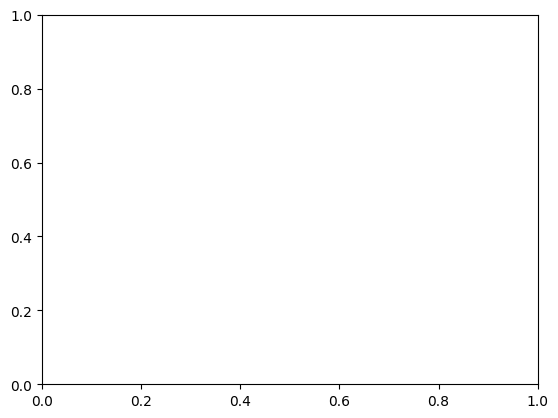

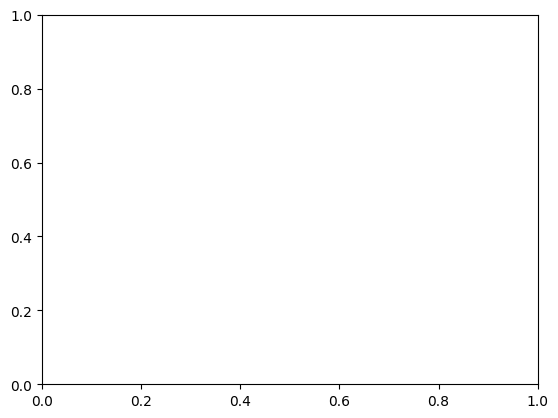

In [ ]:
No_of_Towers = 30
No_of_Forbidden_Areas = 4
Spacing_Flag = 0
order = 0
Members_List=[]
T_X_pos = np.zeros(No_of_Towers)
T_Y_pos = np.zeros(No_of_Towers)
T_radius = np.ones(No_of_Towers)*8
F_radius = np.array([5,10,5,10])
#F_X_pos = np.zeros(No_of_Forbidden_Areas)
#F_Y_pos = np.zeros(No_of_Forbidden_Areas)
A_map = X_max*Y_max
F_X_pos = np.array([ 20 , 80 , 90 , 30 ])
F_Y_pos = np.array([ 20 , 40 , 80 , 70 ])
color_list =['blue','green', 'yellow' , 'black' , 'maroon' ,'gray' , 'indigo', 'orange' , 'purple', 'pink' ,'brown'] 
Tower_Order = []
RedZones_Order = []
for i in range (0 ,No_of_Towers):
    Tower_Order.append(i)
for i in range (0 ,No_of_Forbidden_Areas):
    RedZones_Order.append(i)
map_fig, map_axes = plt.subplots()
obj_fig, obj_axes = plt.subplots()


### ***4. Functions Definitions:***


In [ ]:
def get_Towers_Area(T_radius):
  A_total = 0
  for i in  range(0,No_of_Towers):
    At = np.pi*pow(T_radius[i],2)
    A_total = At + A_total
  return A_total

def get_forbidden_zones_area(F_radius):
  Af_total = 0
 #Get the Areas Of The Forbidden Areas:
  for i in range(0,No_of_Forbidden_Areas):
    Af = pi*pow(F_radius[i],2)
    Af_total = Af + Af_total
  return Af_total

def get_Specified_Intersected_Area(X_Pos_1 ,Y_Pos_1 ,X_Pos_2 , Y_Pos_2 , Radius_1 , Radius_2):
  centre_distance = np.sqrt(pow(X_Pos_1-X_Pos_2, 2)+pow(Y_Pos_1-Y_Pos_2, 2))
  if (centre_distance > Radius_1 + Radius_2):
    intersected_area = 0
  elif (centre_distance <= abs(Radius_1 - Radius_2)):
      if (Radius_1 >= Radius_2):
          intersected_area = np.pi*pow(Radius_2, 2)
      else: # self.r < other.r
          intersected_area = np.pi*pow(Radius_1, 2)
  else:
    alpha = np.arccos(((Radius_1 * Radius_1) + (centre_distance * centre_distance) - (Radius_2 * Radius_2)) / (2 * Radius_1 * centre_distance)) * 2# 2.0*np.arccos(pow(Radius_1, 2)+pow(centre_distance, 2)-pow(Radius_2, 2)/(2.0* Radius_1*centre_distance))
    Beta  = np.arccos(((Radius_2 * Radius_2) + (centre_distance * centre_distance) - (Radius_1 * Radius_1)) / (2 * Radius_2 * centre_distance)) * 2                                                                                                                                  #2.0*np.arccos(pow(Radius_2, 2)+pow(centre_distance, 2)-pow(Radius_1, 2)/(2.0*Radius_2*centre_distance))
    a1 = 0.5*pow(Radius_2, 2)*(Beta-np.sin(Beta ))
    a2 = 0.5*pow(Radius_1, 2)*(alpha -np.sin(alpha))
    intersected_area = np.floor(a1+a2)
  return intersected_area  
def get_Towers_Spacing(X_Pos_1 ,Y_Pos_1 ,X_Pos_2 , Y_Pos_2 ):
  Towers_Spacing = np.sqrt(pow(X_Pos_1-X_Pos_2, 2)+pow(Y_Pos_1-Y_Pos_2, 2))
  return Towers_Spacing

def get_order(X_Pos , Y_Pos):
  List = [X_Pos , Y_Pos]
  order = Members_List.index(List)
  return order
# objective function
def get_objective(T_X_poss , T_Y_poss ):
  covered_area   = 0
  towers_spacing = 0

   # towers:
  covered_area = get_Towers_Area(T_radius) + get_forbidden_zones_area(F_radius)
  for i in range(0, No_of_Towers-1):   
        for j in range(i, No_of_Towers):
          if (i == j):
              covered_area = covered_area
          else:
            covered_area -=  get_Specified_Intersected_Area(T_X_poss[i],T_Y_poss[i],T_X_poss[j],T_Y_poss[j],T_radius[i],T_radius[j])
            towers_spacing += get_Towers_Spacing(T_X_poss[i],T_X_poss[j],T_Y_poss[i],T_Y_poss[j])

  # RedZones:
  covered_area += get_forbidden_zones_area(F_radius)
  for i in range(0,No_of_Forbidden_Areas-1):
      for j in range(i+1,No_of_Forbidden_Areas):
          covered_area -= get_Specified_Intersected_Area(F_X_pos[i],F_X_pos[j],F_Y_pos[i],F_Y_pos[j],F_radius[i],F_radius[j])

  objective_value = pow(covered_area,1) # + pow(towers_spacing ,2)

  return objective_value

def feasibility_check(X_Pos , Y_Pos , Radius ):
 RedZone_flag = 0
 Spacing_flag = 0
 counterr = 0
 order = get_order(X_Pos , Y_Pos) 
 epslon = 3
 Tower_order = 0
 
 for RedZone in RedZones_Order:
    if(get_Specified_Intersected_Area(X_Pos,Y_Pos ,F_X_pos[RedZone],F_Y_pos[RedZone],Radius,F_radius[RedZone]) > 0):
       RedZone_flag = 1 
       break
 initial_Order =  int (order/No_of_Towers)
 for member in range (initial_Order*No_of_Towers  , initial_Order*No_of_Towers + No_of_Towers  ):
        Tower_order = get_order(Members_List[member][0],Members_List[member][1])
        if ( Tower_order == order ):
            Spacing_flag = 0
        else:  
            if( get_Specified_Intersected_Area(X_Pos,Y_Pos ,Members_List[member][0],Members_List[member][1],Radius,T_radius[0]) < 5 ):
              Spacing_flag = 1
      
            elif(get_Specified_Intersected_Area(X_Pos,Y_Pos ,Members_List[member][0],Members_List[member][1],Radius,T_radius[0]) == 0 ):
               Spacing_flag = 0
              
            elif (Tower_order != order and X_Pos == Members_List[member][0] and Y_Pos == Members_List[member][1] ):
               Spacing_flag = 2 
               break 
            else :
                Spacing_flag = 2 
                break 
        
 #if    X_Pos < Radius or  X_Pos > X_max - Radius      : Check = False
 #elif  Y_Pos < Radius or  Y_Pos > Y_max - Radius      : Check = False
 if  RedZone_flag !=0                                 : Check = False
 elif  Spacing_flag ==2                               : Check = False
 else                                                 : Check = True
 return Check
 
def get_Member(Index):
  Member= []
  for j in range(No_of_Towers*Index ,No_of_Towers*Index + No_of_Towers ):
      Member.append(Members_List[j])
  return Member

def Validate_Coordinates_Constrain():

  for member , Tower_no in zip(Members_List , Tower_Order):
    if  member[0] < 0 :
        Members_List[Tower_no][0] = 0
    elif member[0] > X_max - T_radius[Tower_no] :
         Members_List[Tower_no][0] = X_max - T_radius[Tower_no]
    if  member[1] < 0 :
       Members_List[Tower_no][1] = 0
    elif  member[1] > Y_max - T_radius[Tower_no]:
       Members_List[Tower_no][1] = Y_max - T_radius[Tower_no]

def Visualize_Solution(Members_List):
  print(Members_List)
  fig = plt.gcf()
  axes = fig.gca()
  axes.cla()
  axes.set_xlim((0, X_max))
  axes.set_ylim((0, Y_max))
  axes.set_aspect(1)
  for tower in Members_List :
    axes.add_artist(plt.Circle((tower[0], tower[1]), T_radius[0],facecolor='blue', edgecolor='black'))
  for i in range(0,No_of_Forbidden_Areas):
    axes.add_artist(plt.Circle((F_X_pos[i], F_Y_pos[i]),F_radius[i], color='r'))
  plt.title('Visualization Map')
  plt.ylabel("Y Coordinate")
  plt.xlabel("X Coordinate")
  plt.show()
  #fig.savefig('Visualization Map.png')

def visualize_objFunc(values):
  obj_axes.plot(values, 'g')
  plt.title('Objective Function')
  obj_fig.savefig('Objective Function.png')
def Generate_First_Solution():
  Members_List.clear()
  RedZone_flag = 0
  for i in range(0,No_of_Towers):
    Members_Parameters_list =list()
    T_X_pos[i] = random.randint(9,90)
    T_Y_pos[i] = random.randint(9,90)
    for RedZone in RedZones_Order:
      if(get_Specified_Intersected_Area(T_X_pos[i],T_Y_pos[i],F_X_pos[RedZone],F_Y_pos[RedZone],T_radius[0],F_radius[RedZone]) > 0):
       RedZone_flag = 1 
       #print("red flag")
       break
      else:
        RedZone_flag = 0
    while (T_X_pos[i] < T_radius[i] or T_X_pos[i] > (X_max - T_radius[i]) or RedZone_flag == 1 ):
      T_X_pos[i] = random.randint(9,90)
      for RedZone in RedZones_Order:
        if(get_Specified_Intersected_Area(T_X_pos[i],T_Y_pos[i],F_X_pos[RedZone],F_Y_pos[RedZone],T_radius[0],F_radius[RedZone]) > 0):
          RedZone_flag = 1 
       #print("red flag")
          break
        else:
          RedZone_flag = 0
    while (T_Y_pos[i] < T_radius[i] or T_Y_pos[i] > (Y_max - T_radius[i]) or RedZone_flag == 1  ):
      T_Y_pos[i] = random.randint(9,90)
      for RedZone in RedZones_Order:
        if(get_Specified_Intersected_Area(T_X_pos[i],T_Y_pos[i],F_X_pos[RedZone],F_Y_pos[RedZone],T_radius[0],F_radius[RedZone]) > 0):
          RedZone_flag = 1 
       #print("red flag")
          break
        else:
          RedZone_flag = 0
    Members_Parameters_list.append(T_X_pos[i])
    Members_Parameters_list.append(T_Y_pos[i])
    Members_List.append(Members_Parameters_list)
  #Validate_Coordinates_Constrain()       
  return Members_List
def get_updated():
  for i in range(0,No_of_Towers):
    X_current[i] = X_new[i]
    Y_current[i] = Y_new[i]

### ***5. Simulated Annealing Algorithm (SA) Initialization and Approach :***

### *5.1 Algorithm's Parameters Initalization :*

In [ ]:
max_No_Of_Itt = 500
T_init = 100
T_final = 0.001
linear_colling_param = (T_init-T_final)/max_No_Of_Itt
X_Coordinates_List =[]
Y_Coordinates_List =[]
X_Coordinates = []
Y_Coordinates =[]
Objective_Function_Values = []
X_current = np.zeros(No_of_Towers)
Y_current = np.zeros(No_of_Towers)
X_new = np.zeros(No_of_Towers)
Y_new = np.zeros(No_of_Towers)
T = T_init
temp_values = np.zeros(max_No_Of_Itt+1)
temp_values[0] = T_init
Objective_Function_Values.insert(0,get_objective(T_X_pos,T_Y_pos))
temp_values[0] = T_init
Members_List = Generate_First_Solution()
print(Members_List)
print(len(Members_List))
i = 0
for member in Members_List:
#for i in range(0, No_of_Towers):
    X_current[i] = Members_List[i][0]
    Y_current[i] = Members_List[i][1]
    i = i + 1


[[53.0, 49.0], [67.0, 61.0], [40.0, 35.0], [66.0, 57.0], [86.0, 14.0], [14.0, 79.0], [57.0, 90.0], [39.0, 44.0], [33.0, 90.0], [70.0, 78.0], [36.0, 39.0], [41.0, 49.0], [46.0, 27.0], [29.0, 44.0], [60.0, 52.0], [47.0, 77.0], [41.0, 86.0], [45.0, 39.0], [18.0, 84.0], [50.0, 51.0], [42.0, 50.0], [56.0, 15.0], [19.0, 49.0], [65.0, 67.0], [33.0, 42.0], [64.0, 65.0], [49.0, 13.0], [52.0, 59.0], [74.0, 13.0], [43.0, 27.0]]
30


In [ ]:
max_member = []
max_objective = 0
for i in range(0,max_No_Of_Itt):
  for j in range(0,No_of_Towers):
    X_new[j] = X_current[j] + random.randint(0,10)
    Y_new[j] = Y_current[j] + random.randint(0,10) 
    while (X_new[j] < T_radius[j] or X_new[j]> (X_max - T_radius[j]) ):
          X_new[j] = random.randint(9,90)
    Members_List[j][0] = X_new[j]
    while (Y_new[j] < T_radius[j] or Y_new[j] > (Y_max - T_radius[j])  ):
            Y_new[j] = random.randint(9,90)
    Members_List[j][1] = Y_new[j]
  for member in Members_List:
    RedZone_flag = 0
    for RedZone in RedZones_Order:
      if(get_Specified_Intersected_Area(member[0],member[1],F_X_pos[RedZone],F_Y_pos[RedZone],T_radius[0],F_radius[RedZone]) > 0):
       RedZone_flag = 1 
       #print("red flag")
       break
      else:
        RedZone_flag = 0
    order = get_order(member[0],member[1])
    for j in range(0,No_of_Towers):
      if (order != j):
        while (member[0] < T_radius[j] or member[0]> (X_max - T_radius[j]) or member[0] == X_new[j] or RedZone_flag == 1):
          X_new[j] = random.randint(9,90)
          for RedZone in RedZones_Order:
            if(get_Specified_Intersected_Area(X_new[j],member[1],F_X_pos[RedZone],F_Y_pos[RedZone],T_radius[0],F_radius[RedZone]) > 0):
              RedZone_flag = 1 
              #print("red flag")
              break
            else:
              RedZone_flag = 0
        Members_List[j][0] = X_new[j]
        RedZone_flag = 1
        while (member[1] < T_radius[j] or member[1]  > (Y_max - T_radius[j]) or member[1] == Y_new[j] or RedZone_flag == 1 ):
          Y_new[j] = random.randint(9,90)
          for RedZone in RedZones_Order:
            if(get_Specified_Intersected_Area(X_new[j],Y_new[j],F_X_pos[RedZone],F_Y_pos[RedZone],T_radius[0],F_radius[RedZone]) > 0):
              RedZone_flag = 1 
              #print("red flag")
              break
            else:
              RedZone_flag = 0
        Members_List[j][1] = Y_new[j]
      else:
        n = 0
 # print(Members_List)
  counter = 0
  #print(Members_List)
  new_obj_value = get_objective(X_new,Y_new)
  old_obj_value = get_objective(X_current,Y_current)
  delta_E =  -new_obj_value + old_obj_value
  #print(new_obj_value)
  if (delta_E < 0):
    get_updated()
    Objective_Function_Values.insert(i+1,new_obj_value)
   # print("Solution_Updated_1")
  else:
    prob = math.exp(-delta_E/T)
    r = 0.7
    if (r < prob):
      get_updated()
      Objective_Function_Values.insert(i+1,new_obj_value)
      #print("Solution_Updated_2")
    else:
      b = 0
      for member in Members_List:
        Members_List[b][0] = X_current[b]
        Members_List[b][1] = Y_current[b]
        b = b + 1
      Objective_Function_Values.insert(i+1,old_obj_value)
  if (Objective_Function_Values[i] > max_objective ):
    max_objective = Objective_Function_Values[i]
    max_member = Members_List
  Visualize_Solution(Members_List)
  T = T_init - linear_colling_param*i
  temp_values[i+1] = T


In [ ]:
max_value = max( Objective_Function_Values)
index = np.argmax(Objective_Function_Values)
print(max_value)
print(index)

5664.654221687303
114


[[91.0, 64.0], [53.0, 35.0], [14.0, 86.0], [64.0, 51.0], [34.0, 48.0], [51.0, 60.0], [90.0, 23.0], [21.0, 41.0], [41.0, 30.0], [60.0, 85.0], [27.0, 47.0], [87.0, 13.0], [74.0, 23.0], [62.0, 15.0], [70.0, 74.0], [78.0, 73.0], [68.0, 64.0], [67.0, 61.0], [57.0, 73.0], [77.0, 14.0], [76.0, 89.0], [52.0, 38.0], [35.0, 21.0], [45.0, 80.0], [40.0, 39.0], [29.0, 88.0], [72.0, 60.0], [56.0, 35.0], [44.0, 16.0], [18.0, 45.0]]
5664.654221687303
[[91.0, 64.0], [53.0, 35.0], [14.0, 86.0], [64.0, 51.0], [34.0, 48.0], [51.0, 60.0], [90.0, 23.0], [21.0, 41.0], [41.0, 30.0], [60.0, 85.0], [27.0, 47.0], [87.0, 13.0], [74.0, 23.0], [62.0, 15.0], [70.0, 74.0], [78.0, 73.0], [68.0, 64.0], [67.0, 61.0], [57.0, 73.0], [77.0, 14.0], [76.0, 89.0], [52.0, 38.0], [35.0, 21.0], [45.0, 80.0], [40.0, 39.0], [29.0, 88.0], [72.0, 60.0], [56.0, 35.0], [44.0, 16.0], [18.0, 45.0]]


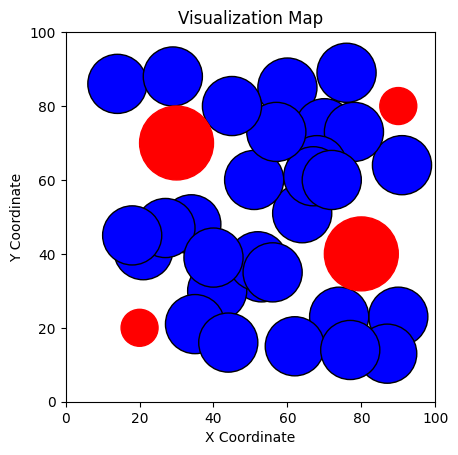

In [ ]:
print(max_member)
x_max = np.zeros(No_of_Towers)
y_max = np.zeroes(No_of_Towers)
b = 0
for member in max_member:
  x_test = max_member[b][0]
  y_max = max_member[b][1]
obj_value = get_objective(x_max,y_max)
print(obj_value)
Visualize_Solution(max_member)
